In [8]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from collections import defaultdict
import shutil
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

 
pipeline = joblib.load('/media/amlan/Data/Thesis Data/Processed Data/RF_model.mod')


GROUPS = ['NQ_2021_1','RW_2021_1','ZU_2021_1','ZU_2021_2']


predict_data = pd.DataFrame()
for k in GROUPS:
    ACCPath = '/media/amlan/Data/Thesis Data/Processed Data/'+k+'/ACC/'
    PredictPath = '/media/amlan/Data/Thesis Data/Processed Data/'+k+'/Predictions/'
      
    shutil.rmtree(PredictPath, ignore_errors=True)
    os.makedirs(PredictPath, exist_ok=True)

    ACCpaths = os.listdir(ACCPath)
    
    ACCpaths = [i for i in ACCpaths if '.ipynb_checkpoints' not in i]
    

    for i in ACCpaths:
        
        main_file = pd.read_csv(ACCPath + i,index_col=0)
        
        main_file.reset_index(drop=True,inplace=True)
    
        Data= main_file.drop(['StdNorm','VeDBA'],axis=1).iloc[:,1:]
        
        main_file['Behavior'] = pipeline.predict(Data)
        filename = i.split('_')
        main_file['Group'] = filename[0]
        main_file['Individual'] = filename[1]
        if k == 'NQ_2021_1':
            main_file['Axy'] = filename[4]
        else:
            main_file['Axy'] = filename[3][3:]
        
        main_file.to_csv(PredictPath + '_'.join(filename[0:2]) + '_' + filename[-1])
        #predict_data = pd.concat([predict_data,main_file],axis=0)
        print('Predicted For: ','_'.join(filename[0:2]) + '_' + filename[-1])
        
#predict_data.to_csv('/media/amlan/Data/Thesis Data/Processed Data/Predicted_data.csv')


Predicted For:  NQ_VNQM012_2021-08-11
Predicted For:  NQ_VNQF013_2021-08-11
Predicted For:  NQ_VNQF013_2021-08-12
Predicted For:  NQ_VNQF014_2021-08-11
Predicted For:  NQ_VNQF014_2021-08-12
Predicted For:  NQ_VNQF014_2021-08-13
Predicted For:  NQ_VNQF014_2021-08-14
Predicted For:  NQ_VNQF014_2021-08-15
Predicted For:  NQ_VNQF020_2021-08-11
Predicted For:  NQ_VNQF020_2021-08-12
Predicted For:  NQ_VNQF020_2021-08-13
Predicted For:  NQ_VNQF020_2021-08-14
Predicted For:  NQ_VNQM012_2021-08-12
Predicted For:  NQ_VNQM012_2021-08-13
Predicted For:  NQ_VNQM018_2021-08-11
Predicted For:  NQ_VNQM018_2021-08-12
Predicted For:  NQ_VNQM018_2021-08-13
Predicted For:  NQ_VNQM018_2021-08-14
Predicted For:  NQ_VNQM018_2021-08-15
Predicted For:  NQ_VNQM018_2021-08-16
Predicted For:  RW_VJXM122_2021-06-04
Predicted For:  RW_VJXM122_2021-06-05
Predicted For:  RW_VJXM122_2021-06-06
Predicted For:  RW_VJXM122_2021-06-07
Predicted For:  RW_VJXM122_2021-06-08
Predicted For:  RW_VJXM122_2021-06-09
Predicted Fo

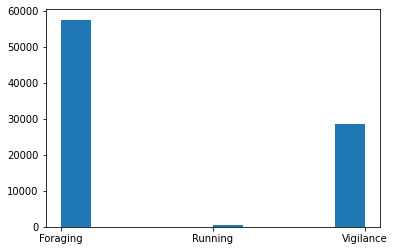

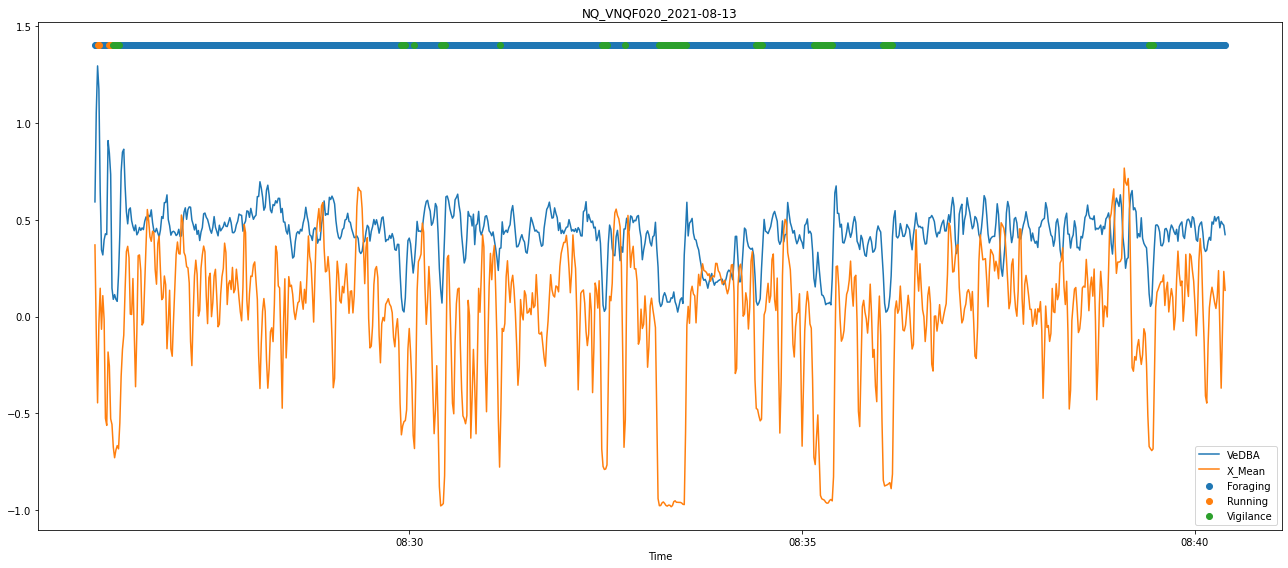

In [9]:
GROUPS = ['NQ_2021_1','RW_2021_1','ZU_2021_1','ZU_2021_2']
import matplotlib.dates



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import random 

plt.rcParams.update({'font.size': 22})
# %%


k = random.sample(GROUPS,1)
ModelData = '/media/amlan/Data/Thesis Data/Processed Data/'+k[0]+'/Predictions/'



paths = os.listdir(ModelData)


for i in random.sample(paths,1):
    
    Data = pd.read_csv(ModelData+i,usecols =['X_Mean','X_Max','Y_Var','Timestamp','VeDBA','Behavior'])
    #Data = Data[Data['VeDBA']>1e-6]
    Data['VeDBA']  = Data['VeDBA'].rolling(window=3,center=True).mean()
    #Data['VeDBA'] = np.log(Data['VeDBA'])
    Data = Data.dropna(axis=0)
    
    
    Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])
    
    plt.figure()
    plt.hist(Data['Behavior'])
    plt.show()
    n = random.randint(0, Data.shape[0]- Data.shape[0]//2)
    Data = Data.loc[n:n+Data.shape[0]//100,:]
    Data = Data.reset_index(drop=True)
    fig,ax = plt.subplots(figsize=(18,8))
    x = Data['Timestamp']
    y = Data['Y_Var']
    w = Data['X_Mean']
    z = Data['VeDBA']
    
    ax.plot(x, z, label='VeDBA')
    ax.plot(x, w, label='X_Mean')
    #ax.plot(x, y, label='Y_Var')
    ax.set(xlabel='Time', ylabel='')
    ax.set_title(i)
    
    for state, values in Data.groupby('Behavior'):
        ax.scatter(values['Timestamp'], [1.4]*len(values['Timestamp']), label=state)
    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
    
    
    plt.tight_layout()
    plt.show()
    




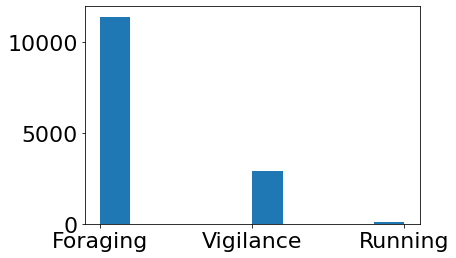

6131


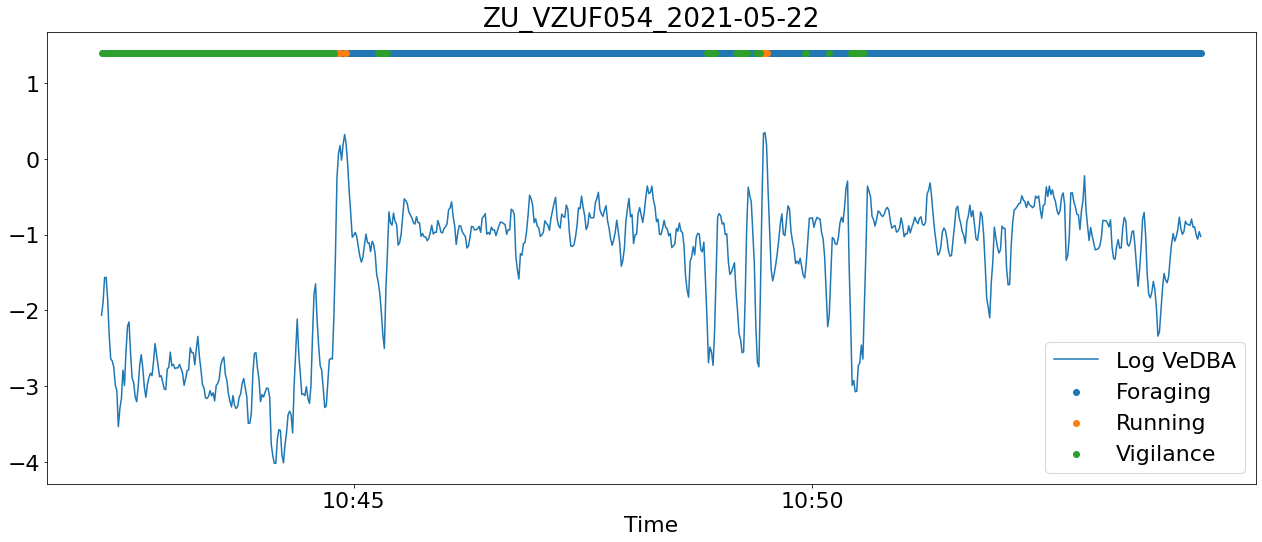

In [13]:
GROUPS = ['NQ_2021_1','RW_2021_1','ZU_2021_1','ZU_2021_2']
import matplotlib.dates



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import random as r

plt.rcParams.update({'font.size': 22})
# %%


k = random.sample(GROUPS,1)
ModelData = '/media/amlan/Data/Thesis Data/Processed Data/'+k[0]+'/Predictions/'



paths = os.listdir(ModelData)


for i in random.sample(paths,1):
    
    Data = pd.read_csv(ModelData+i,usecols =['X_Mean','X_Max','Y_Var','Timestamp','VeDBA','Behavior'])
    Data = Data[Data['VeDBA']>1e-6]
    Data['VeDBA'] = np.log(Data['VeDBA'])
    Data['VeDBA']  = Data['VeDBA'].rolling(window=3,center=True).mean()
    Data = Data.dropna(axis=0)
    
    dates = i.split('_')[-1].split('-')
    
    Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])
    Data = Data.loc[((Data['Timestamp'].dt.hour > 8) & (Data['Timestamp'].dt.hour < 13)) ]
    #Data = Data.reset_index(drop=True)
    plt.figure()
    plt.hist(Data['Behavior'])
    plt.show()
    
    Data = Data.reset_index(drop=True)
    n = r.randint(0, Data.shape[0]- Data.shape[0]//2)
    print(n)
    Data = Data.loc[n:n+Data.shape[0]//20,:]
    
    fig,ax = plt.subplots(figsize=(18,8))
    x = Data['Timestamp']
    y = Data['Y_Var']
    w = Data['X_Mean']
    z = Data['VeDBA']
    
    ax.plot(x, z, label='Log VeDBA')
    #ax.plot(x, w, label='X_Mean')
    #ax.plot(x, y, label='Y_Var')
    ax.set(xlabel='Time', ylabel='')
    ax.set_title(i)
    
    for state, values in Data.groupby('Behavior'):
        ax.scatter(values['Timestamp'], [1.4]*len(values['Timestamp']), label=state)
    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
    
    
    plt.tight_layout()
    plt.show()
    




In [71]:
from joblib import Parallel, delayed

pipeline = joblib.load('/media/amlan/Data/Thesis Data/Processed Data/RF_model.mod')


GROUPS = ['NQ_2021_1','RW_2021_1','ZU_2021_1','ZU_2021_2']

def predict(path,k,PredictPath):
    main_file = pd.read_csv(ACCPath + path,index_col=0)
        
    main_file.reset_index(drop=True,inplace=True)
    Data= main_file.drop(['StdNorm','VeDBA'],axis=1).iloc[:,1:]
    main_file['Behavior'] = pipeline.predict(Data)
    filename = path.split('_')
    main_file['Group'] = filename[0]
    main_file['Individual'] = filename[1]
    if k == 'NQ_2021_1':
            main_file['Axy'] = filename[4]
    else:
            main_file['Axy'] = filename[3][3:]
    main_file.to_csv(PredictPath + '_'.join(filename[0:2]) + '_' + filename[-1])
        
    print('Predicted For: ','_'.join(filename[0:2]) + '_' + filename[-1])
    

for k in GROUPS:
    ACCPath = '/media/amlan/Data/Thesis Data/Processed Data/'+k+'/ACC/'
    PredictPath = '/media/amlan/Data/Thesis Data/Processed Data/'+k+'/Predictions/'
      
    shutil.rmtree(PredictPath, ignore_errors=True)
    os.makedirs(PredictPath, exist_ok=True)

    ACCpaths = os.listdir(ACCPath)
    
    ACCpaths = [i for i in ACCpaths if '.ipynb_checkpoints' not in i]
    
    Predict_Parallel= Parallel(n_jobs=int(cpu_count()/2))(delayed(predict(i,k,PredictPath)) for i in ACCpaths)



['NQ_VNQM012_SHTB_Axy_009_2021-08-13', 'NQ_VNQF013_SHRT_Axy_022_2021-08-11', 'NQ_VNQF013_SHRT_Axy_022_2021-08-12', 'NQ_VNQF014_SHLT_Axy_002_2021-08-11', 'NQ_VNQF014_SHLT_Axy_002_2021-08-12', 'NQ_VNQF014_SHLT_Axy_002_2021-08-13', 'NQ_VNQF014_SHLT_Axy_002_2021-08-14', 'NQ_VNQF014_SHLT_Axy_002_2021-08-15', 'NQ_VNQF020_RRRS_Axy_004_2021-08-11', 'NQ_VNQF020_RRRS_Axy_004_2021-08-12', 'NQ_VNQF020_RRRS_Axy_004_2021-08-13', 'NQ_VNQF020_RRRS_Axy_004_2021-08-14', 'NQ_VNQM012_SHTB_Axy_009_2021-08-11', 'NQ_VNQM012_SHTB_Axy_009_2021-08-12', 'NQ_VNQM012_SHTB_Axy_018_2021-08-11', 'NQ_VNQM012_SHTB_Axy_018_2021-08-12', 'NQ_VNQM012_SHTB_Axy_018_2021-08-13', 'NQ_VNQM012_SHTB_Axy_018_2021-08-14', 'NQ_VNQM012_SHTB_Axy_018_2021-08-15', 'NQ_VNQM012_SHTB_Axy_018_2021-08-16', 'NQ_VNQM018_RRRT_Axy_020_2021-08-11', 'NQ_VNQM018_RRRT_Axy_020_2021-08-12', 'NQ_VNQM018_RRRT_Axy_020_2021-08-13', 'NQ_VNQM018_RRRT_Axy_020_2021-08-14', 'NQ_VNQM018_RRRT_Axy_020_2021-08-15', 'NQ_VNQM018_RRRT_Axy_020_2021-08-16']
Predicted F

TypeError: cannot unpack non-iterable function object